<a href="https://colab.research.google.com/github/atalaydenknalbant/DNN_vs_CNN/blob/main/DNN_VS_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN VS CNN

## Summary
This project compares Which ML algorithm performs better on CIFAR-10 Image Classification Dataset.

## Import Libraries


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import requests
import json
from keras.preprocessing.image import ImageDataGenerator
import random
from sklearn.model_selection import train_test_split

## Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 14s 0us/step


## Create Class Names

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Create Validation Dataset

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)

## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(x_train)

## Create Models

### DNN Model

In [ ]:
model_dnn = keras.Sequential([
            layers.Flatten(input_shape=(32,32,3)),
            layers.Dense(1024, activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.1),
            layers.Dense(512, activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.1),
            layers.Dense(256, activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.1),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')

  ])
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)
model_dnn.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
      metrics=['accuracy'])

### Model Summary

In [ ]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 batch_normalization_10 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                     

### CNN Model

In [ ]:
model_cnn = keras.Sequential([
            keras.Input(shape=(32,32,3),),
            layers.Conv2D(64,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Conv2D(64,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.MaxPooling2D((2,2)),
            layers.Dropout(0.3),
            layers.Conv2D(128,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Conv2D(128,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.MaxPooling2D((2,2)),
            layers.Dropout(0.4),
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Conv2D(256,[3,3],padding='same',activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.5),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.BatchNormalization() ,
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')

  ])
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)
model_cnn.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
      metrics=['accuracy'])

### Model Summary

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

## Train & Test Models

### DNN

In [ ]:
hst_dnn = model_dnn.fit(x_train, y_train, batch_size = 64,
                    steps_per_epoch = len(x_train) // 64,
                    epochs = 125,
                    validation_data= (x_valid, y_valid),
                    verbose=1)

Epoch 1/125
703/703 [==============================] - 11s 10ms/step - loss: 1.9479 - accuracy: 0.3087 - val_loss: 1.6987 - val_accuracy: 0.3870
Epoch 2/125
703/703 [==============================] - 6s 9ms/step - loss: 1.6983 - accuracy: 0.3916 - val_loss: 1.7513 - val_accuracy: 0.3650
Epoch 3/125
703/703 [==============================] - 6s 9ms/step - loss: 1.6131 - accuracy: 0.4240 - val_loss: 1.6961 - val_accuracy: 0.3878
Epoch 4/125
703/703 [==============================] - 6s 8ms/step - loss: 1.5606 - accuracy: 0.4425 - val_loss: 1.6361 - val_accuracy: 0.4120
Epoch 5/125
703/703 [==============================] - 7s 9ms/step - loss: 1.5179 - accuracy: 0.4618 - val_loss: 1.4782 - val_accuracy: 0.4708
Epoch 6/125
703/703 [==============================] - 6s 9ms/step - loss: 1.4741 - accuracy: 0.4743 - val_loss: 1.4989 - val_accuracy: 0.4564
Epoch 7/125
703/703 [==============================] - 7s 9ms/step - loss: 1.4421 - accuracy: 0.4881 - val_loss: 1.4551 - val_accuracy: 0.47

<Axes: >

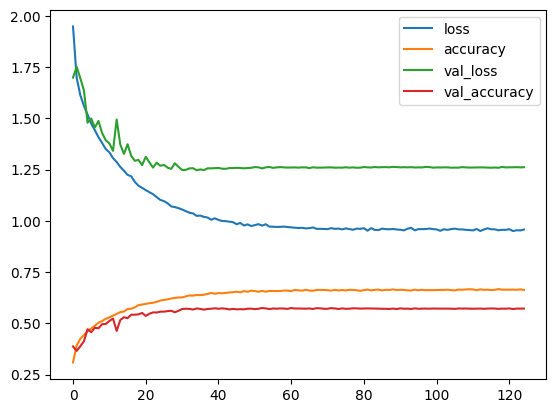

In [ ]:
pd.DataFrame(hst_dnn.history).plot()

In [ ]:
model_dnn.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 1.2506 - accuracy: 0.5685 - 1s/epoch - 3ms/step


[1.2506014108657837, 0.5684999823570251]

313/313 - 1s - 666ms/epoch - 2ms/step


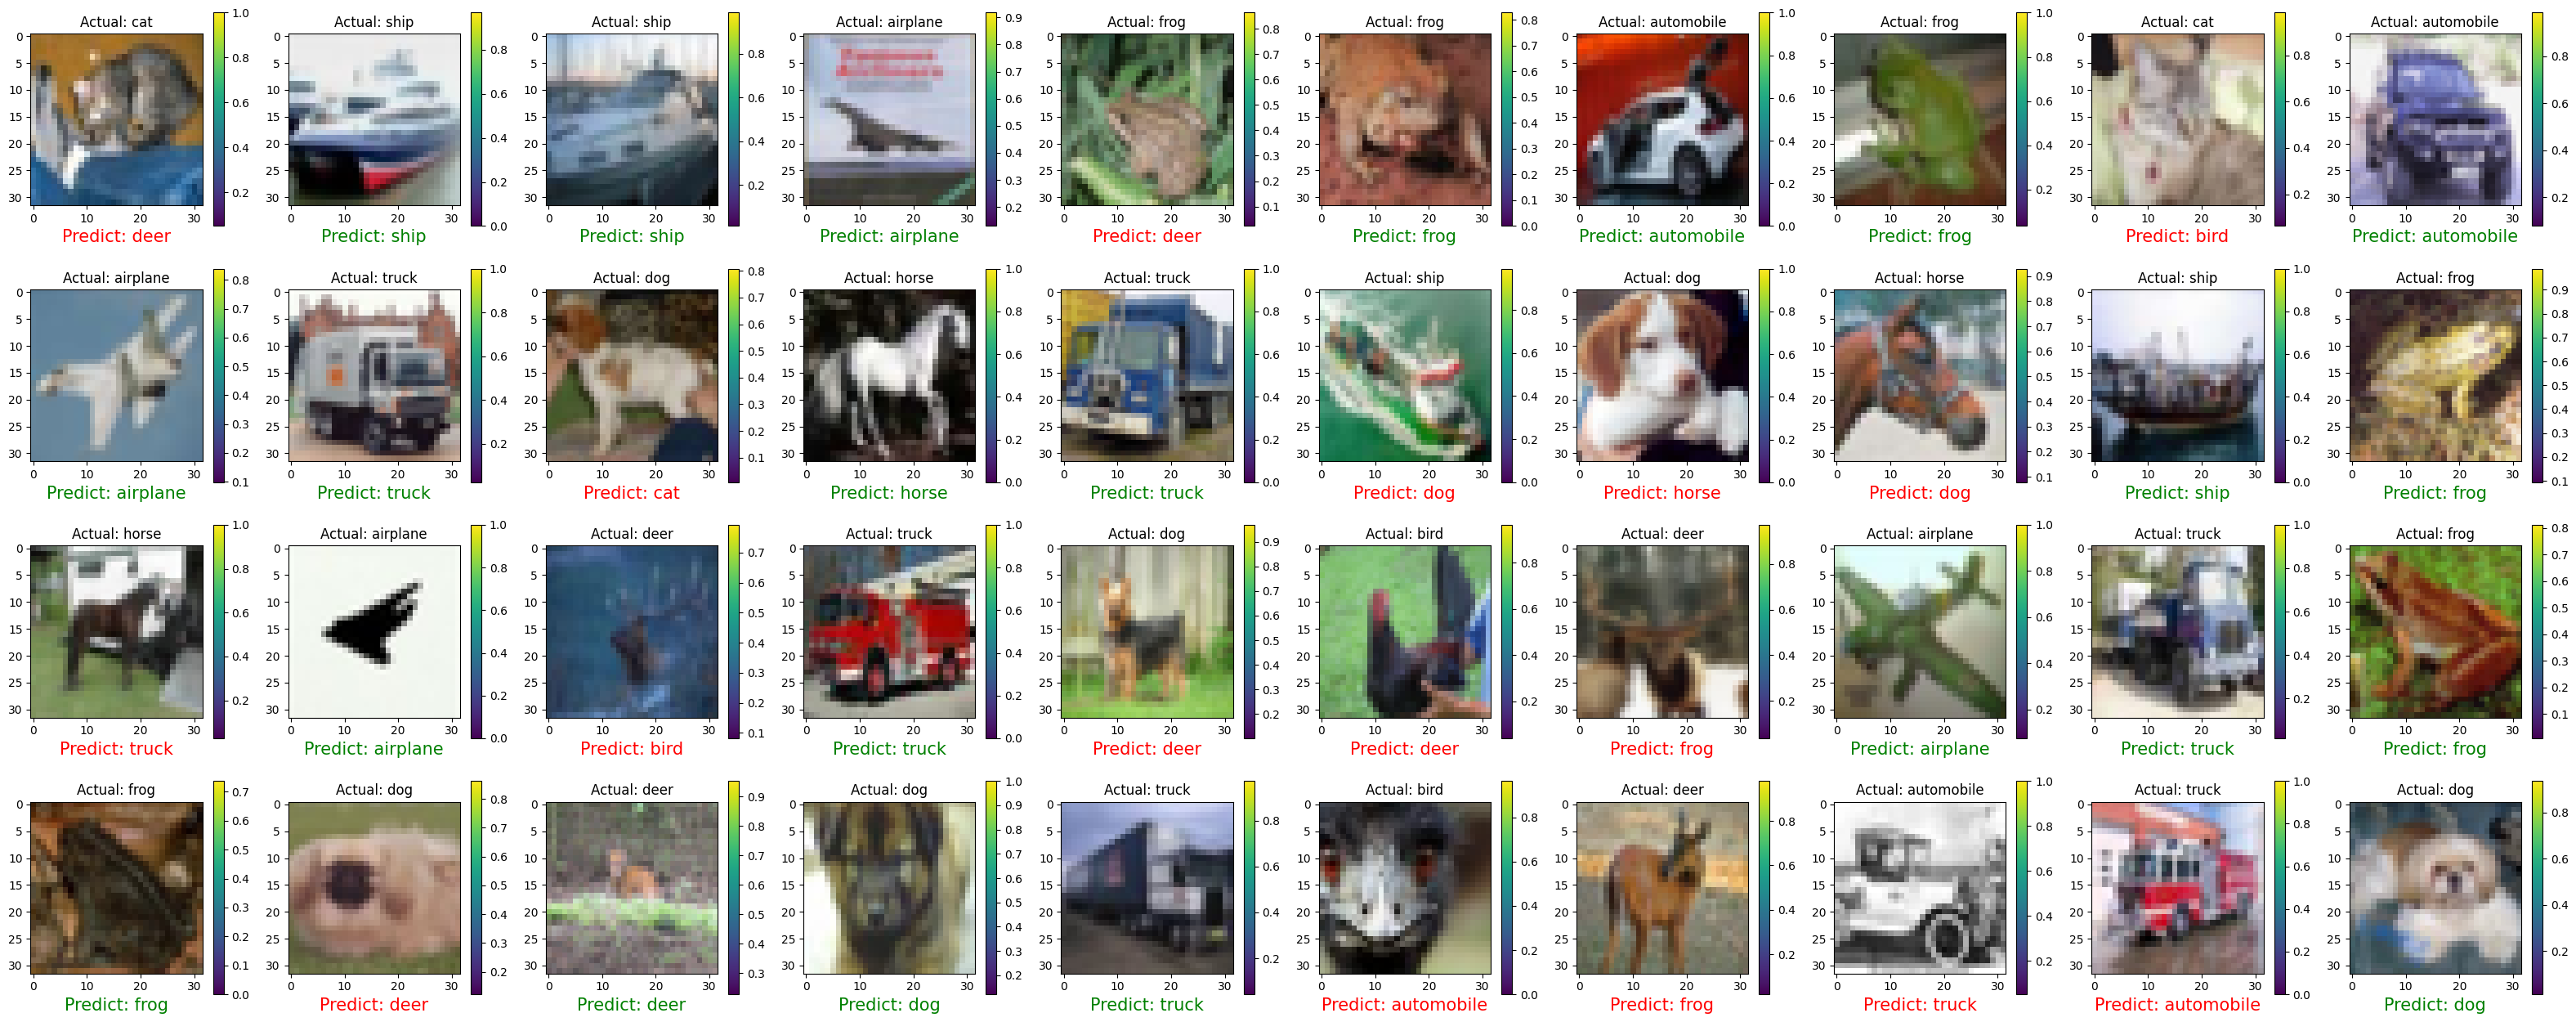

In [ ]:
predictions = model_dnn.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[np.argmax(y_test[i])] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break

### CNN

In [ ]:
hst_cnn = model_cnn.fit(datagen.flow(x_train, y_train, batch_size = 64),
                    steps_per_epoch = len(x_train) // 64,
                    epochs = 125,
                    validation_data= (x_valid, y_valid))


Epoch 1/125
703/703 [==============================] - 52s 50ms/step - loss: 1.6007 - accuracy: 0.4283 - val_loss: 1.3278 - val_accuracy: 0.5528
Epoch 2/125
703/703 [==============================] - 33s 47ms/step - loss: 1.1708 - accuracy: 0.5859 - val_loss: 1.1598 - val_accuracy: 0.6204
Epoch 3/125
703/703 [==============================] - 34s 48ms/step - loss: 0.9668 - accuracy: 0.6635 - val_loss: 0.8906 - val_accuracy: 0.6992
Epoch 4/125
703/703 [==============================] - 34s 49ms/step - loss: 0.8421 - accuracy: 0.7141 - val_loss: 0.8408 - val_accuracy: 0.7140
Epoch 5/125
703/703 [==============================] - 35s 49ms/step - loss: 0.7648 - accuracy: 0.7423 - val_loss: 0.7770 - val_accuracy: 0.7368
Epoch 6/125
703/703 [==============================] - 35s 49ms/step - loss: 0.6970 - accuracy: 0.7663 - val_loss: 0.8233 - val_accuracy: 0.7326
Epoch 7/125
703/703 [==============================] - 33s 47ms/step - loss: 0.6377 - accuracy: 0.7867 - val_loss: 0.5803 - val_ac

<Axes: >

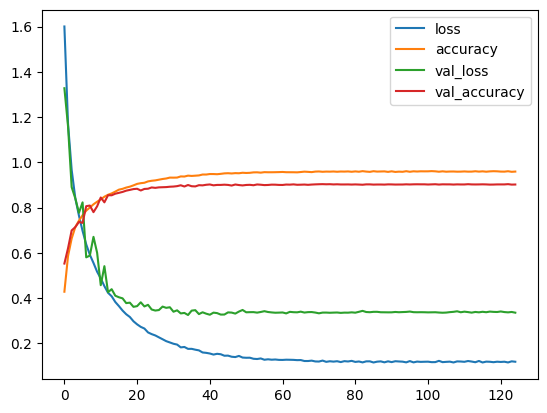

In [ ]:
pd.DataFrame(hst_cnn.history).plot()

In [ ]:
model_cnn.evaluate(x_test,y_test,verbose=2)

313/313 - 2s - loss: 0.3748 - accuracy: 0.8978 - 2s/epoch - 5ms/step


[0.3747677505016327, 0.8978000283241272]

313/313 - 1s - 1s/epoch - 4ms/step


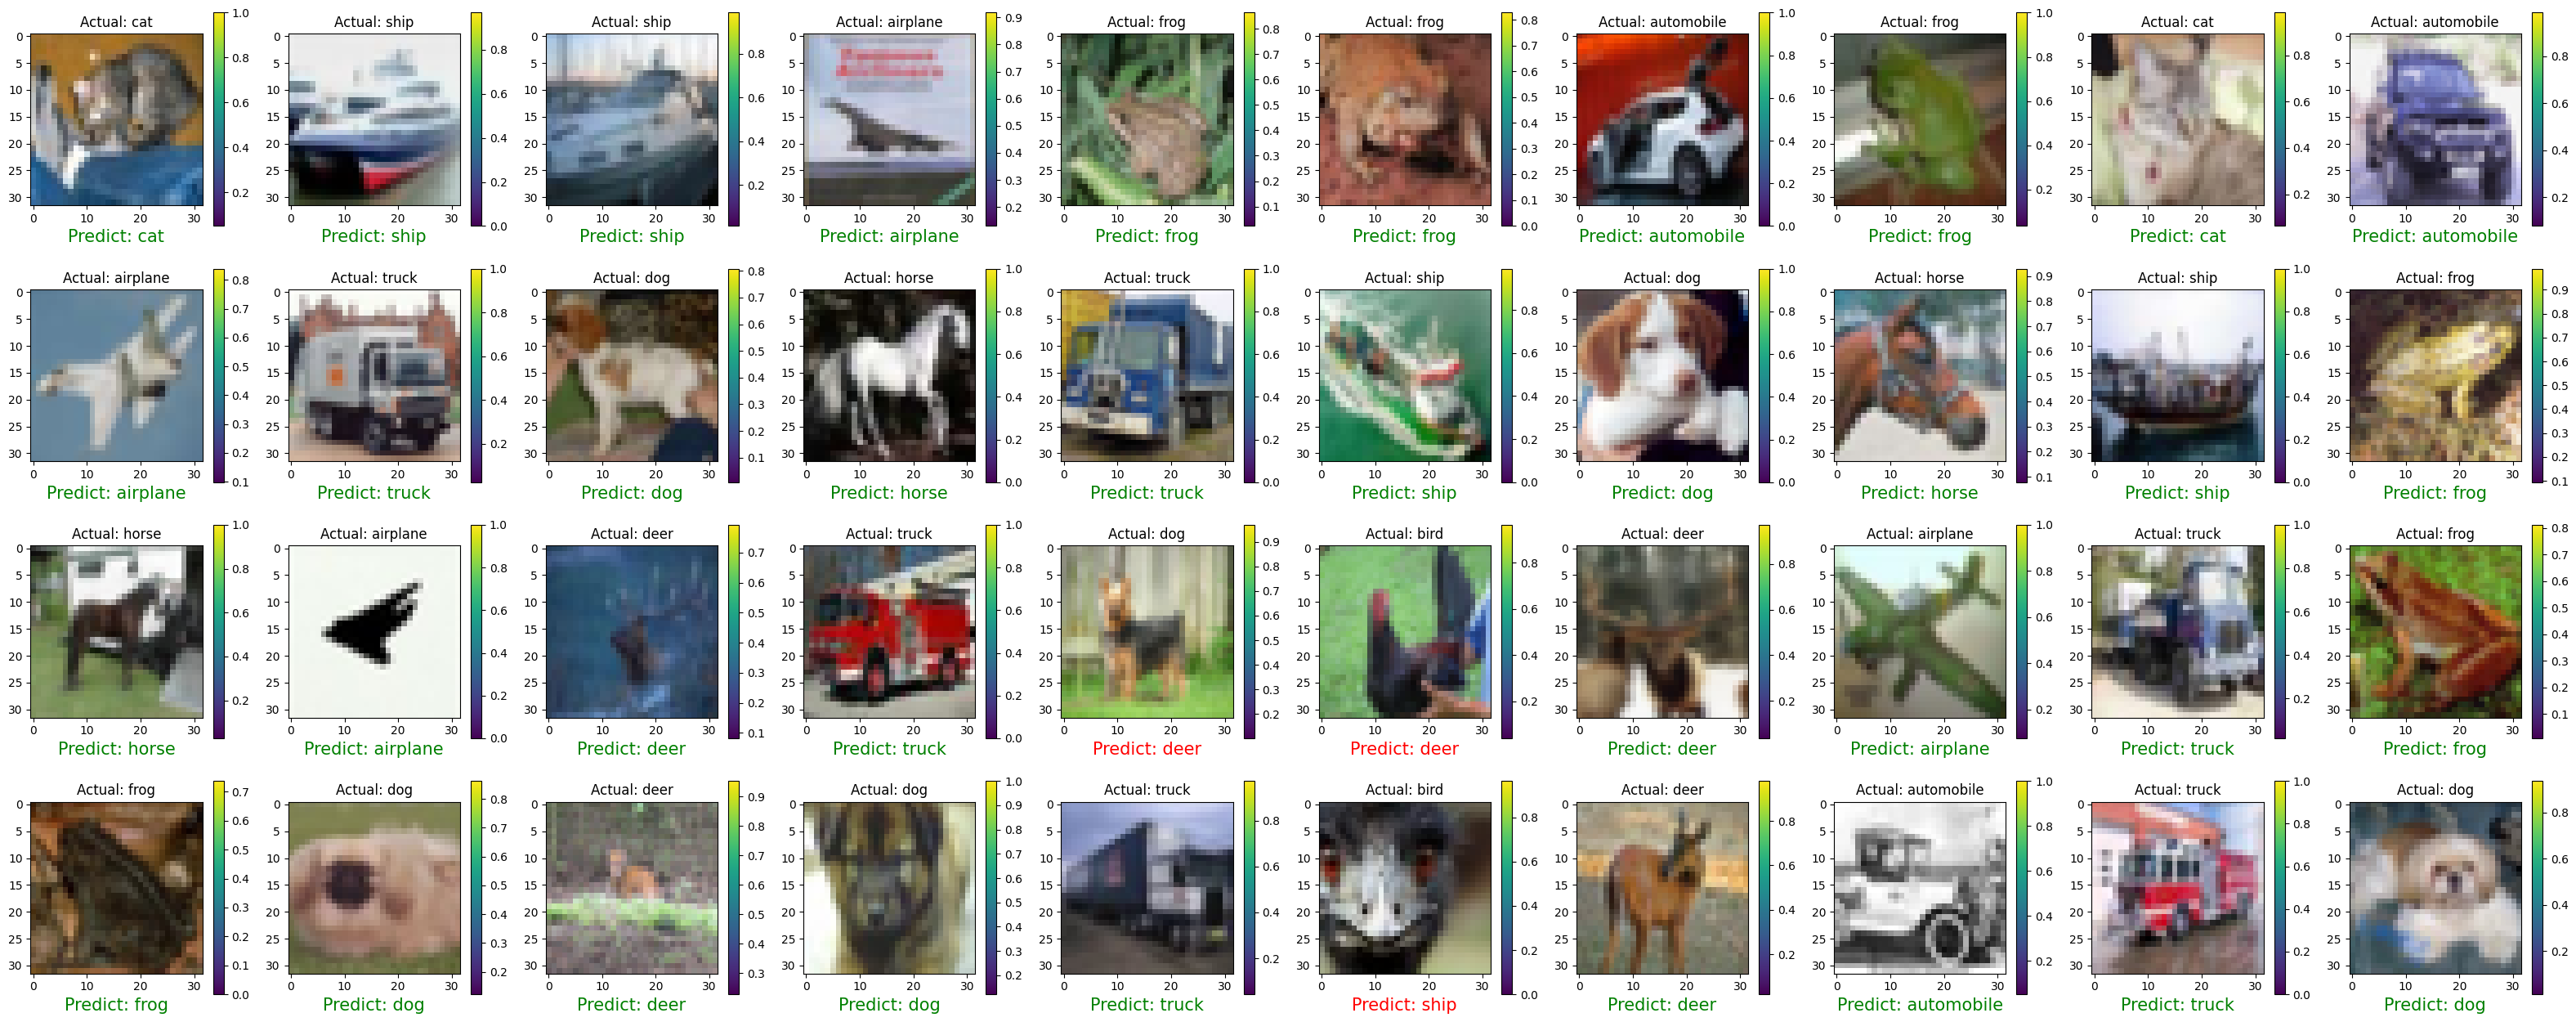

In [ ]:
predictions = model_cnn.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[np.argmax(y_test[i])] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break

## Conclusion
CNN performs better due to cnn convolutional layers uses filters that recognize textures and edges. Better than traditional neural networks.